In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import pickle
%matplotlib inline
import os

In [ ]:
## Example ##


image Shape (720, 1280, 3)


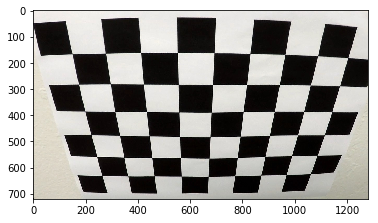

In [2]:
img = mpimg.imread('camera_cal/calibration2.jpg')
image_shape = img.shape
print("image Shape",image_shape)
plt.imshow(img)

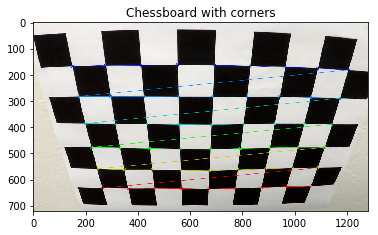

In [3]:
# prepare object points
nx = 9 # The number of inside corners in x
ny = 6 # The number of inside corners in y

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)
    plt.title("Chessboard with corners")
    plt.show()

In [4]:
nx = 9
ny = 6

objpoints = []
imgpoints = []

objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

fnames = glob.glob("camera_cal/calibration*.jpg")

for fname in fnames:
    img = mpimg.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)
        
# use the object and image points to caliberate the camera and compute the camera matrix and distortion coefficients
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_shape[:2],None,None)

In [ ]:
#save
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

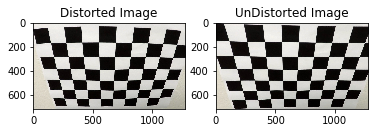

In [5]:
img = mpimg.imread('camera_cal/calibration2.jpg')
undistorted = cv2.undistort(img, mtx, dist, None, mtx)
plt.subplot()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Distorted Image")
plt.subplot(1,2,2)
plt.imshow(undistorted)
plt.title("UnDistorted Image")

In [6]:
def undistortImage(img):
    img = cv2.undistort(img, mtx, dist, None, mtx)
    return img
        
    
    

In [7]:
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output


In [9]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    # Grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    binary_output =  np.zeros_like(absgraddir)
    binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return binary_output

In [10]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    # Convert to grayscale
    #gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

In [26]:
def sobelCombined(sx_binary, dir_binary,mag_binary):
    combined = np.zeros_like(dir_binary)
    combined[(sx_binary == 1)  | ((mag_binary == 1) & (dir_binary == 1))] = 1
    return combined
    

In [11]:
def perspectiveTransform(img,src,dst):
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(undist, M, img_size)

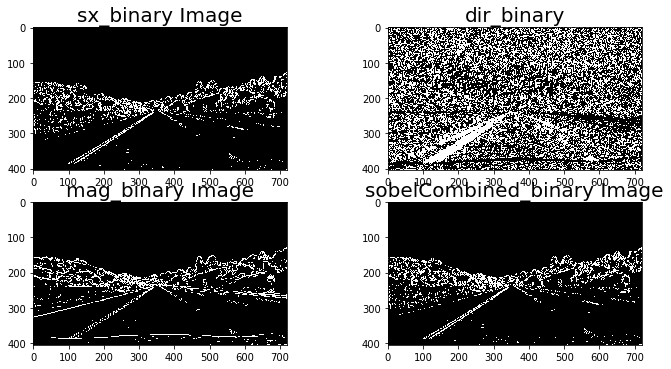

--------------------------------


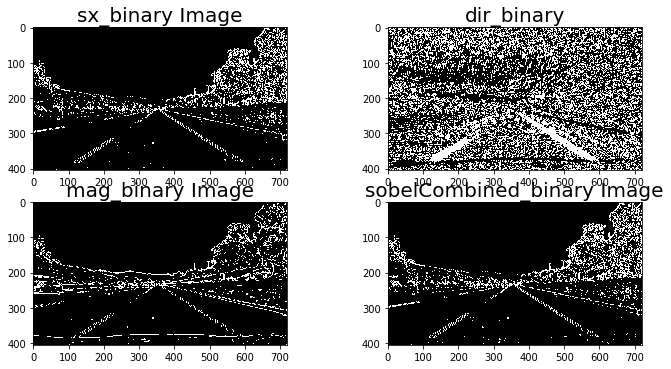

--------------------------------


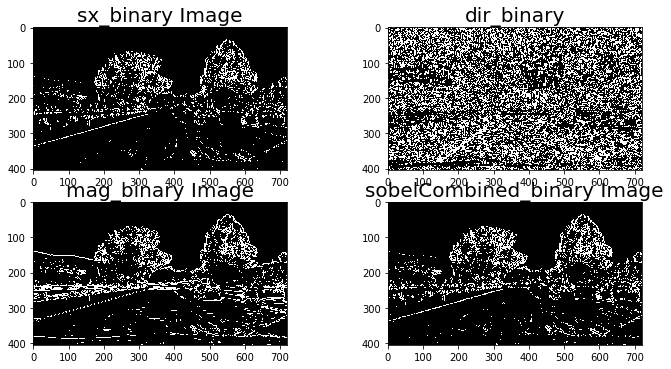

--------------------------------


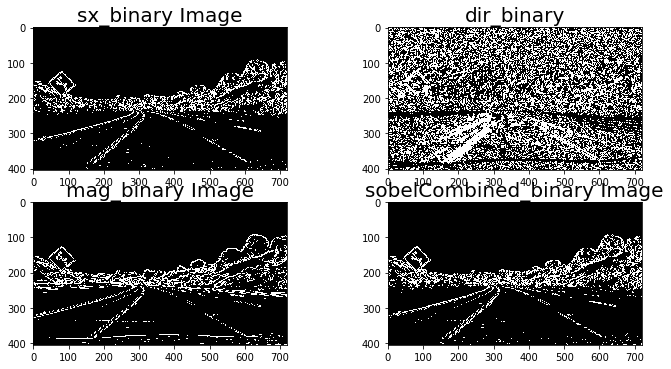

--------------------------------


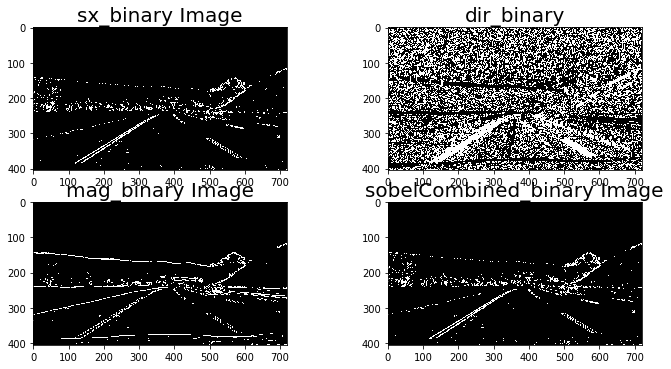

--------------------------------


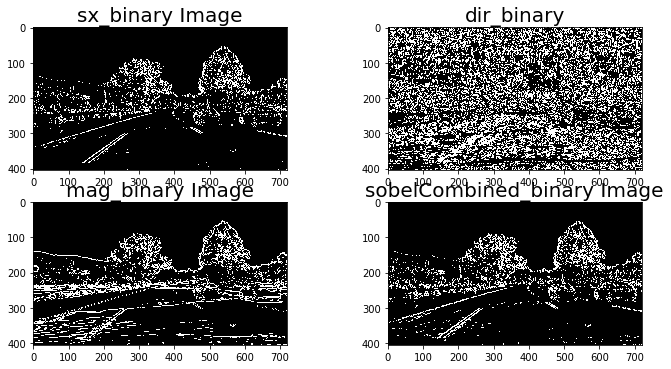

--------------------------------


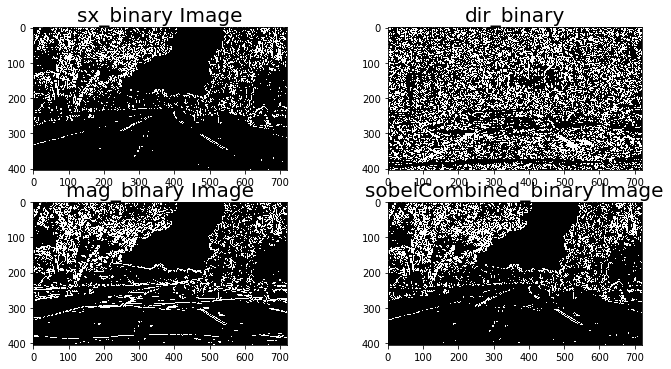

--------------------------------


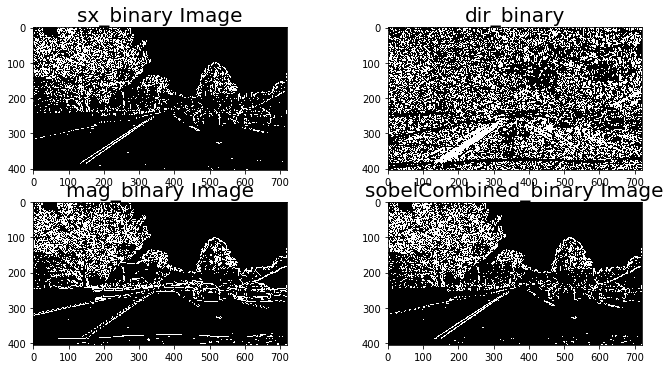

--------------------------------


In [28]:
images = os.listdir('./test_images')  
for image in images:
    image = os.path.join('test_images',image)
    #print(image)
    img = mpimg.imread(image)
    img = cv2.resize(img, (720, 405))
    undistImg=undistortImage(img)
    gray = cv2.cvtColor(undistImg, cv2.COLOR_RGB2GRAY)
    height, width = gray.shape
    sx_binary=abs_sobel_thresh(gray, orient='x', thresh_min=20, thresh_max=100)
    
    # apply gradient direction threshold so that only edges closer to vertical are detected.
    dir_binary = dir_threshold(gray,sobel_kernel=15,thresh=(0.7, 1.3))
    mag_binary=mag_thresh(gray, sobel_kernel=3, mag_thresh=(30, 100))
    
    sobelCombined_binary=sobelCombined(sx_binary, dir_binary,mag_binary)
    
    f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 5))
    f.tight_layout()
    ax1.imshow(sx_binary,cmap="gray")
    ax1.set_title('sx_binary Image', fontsize=20)
    ax2.imshow(dir_binary,cmap="gray")
    ax2.set_title('dir_binary', fontsize=20)
    ax3.imshow(mag_binary,cmap="gray")
    ax3.set_title('mag_binary Image', fontsize=20)
    ax4.imshow(sobelCombined_binary,cmap="gray")
    ax4.set_title('sobelCombined_binary Image', fontsize=20)
    plt.show()
    print("--------------------------------")
    #ax2.set_title('Transformed', fontsize=20)
    #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

image Shape (720, 1280, 3)


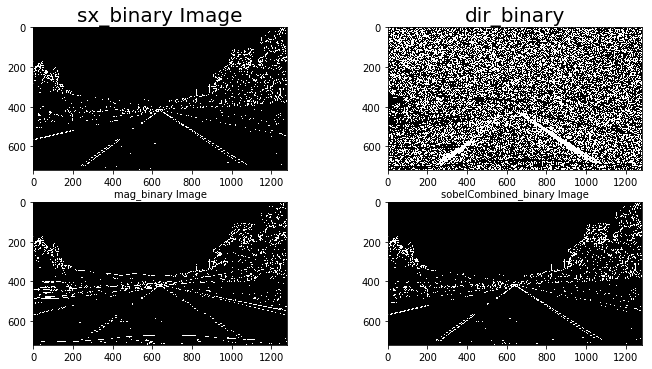

--------------------------------


In [31]:
img = mpimg.imread('test_images/straight_lines2.jpg')
image_shape = img.shape
print("image Shape",image_shape)

undistImg=undistortImage(img)
gray = cv2.cvtColor(undistImg, cv2.COLOR_RGB2GRAY)
height, width = gray.shape
sx_binary=abs_sobel_thresh(gray, orient='x', thresh_min=20, thresh_max=100)
    
# apply gradient direction threshold so that only edges closer to vertical are detected.
dir_binary = dir_threshold(gray,sobel_kernel=15,thresh=(0.7, 1.3))
mag_binary=mag_thresh(gray, sobel_kernel=3, mag_thresh=(30, 100))
    
sobelCombined_binary=sobelCombined(sx_binary, dir_binary,mag_binary)
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(sx_binary,cmap="gray")
ax1.set_title('sx_binary Image', fontsize=20)
ax2.imshow(dir_binary,cmap="gray")
ax2.set_title('dir_binary', fontsize=20)
ax3.imshow(mag_binary,cmap="gray")
ax3.set_title('mag_binary Image', fontsize=10)
ax4.imshow(sobelCombined_binary,cmap="gray")
ax4.set_title('sobelCombined_binary Image', fontsize=10)
plt.show()
print("--------------------------------")